In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [44]:
from sklearn.neighbors import KNeighborsClassifier

### 小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

In [181]:
seeds = pd.read_csv('./data/seeds.tsv', sep='\t', header=None)
seeds

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Canadian
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Canadian
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Canadian
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Canadian


In [182]:
X_train = seeds.iloc[:, 0:7]
y_train = seeds.iloc[:, -1]

In [183]:
display(X_train, y_train)

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


0          Kama
1          Kama
2          Kama
3          Kama
4          Kama
         ...   
205    Canadian
206    Canadian
207    Canadian
208    Canadian
209    Canadian
Name: 7, Length: 210, dtype: object

In [185]:
knn = KNeighborsClassifier()

In [186]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [276]:
n = np.random.randint(0, seeds.shape[0], size=100)
X_test = seeds.take(n).iloc[:, 0:7]
y_test = seeds.take(n).iloc[:, 7]
knn.score(X_test, y_test)

0.94

In [279]:
X_test

,0,1,2,3,4,5,6
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
97,18.98,16.57,0.8687,6.449,3.552,2.144,6.453
182,12.19,13.36,0.8579,5.240,2.909,4.857,5.158
143,12.22,13.32,0.8652,5.224,2.967,5.469,5.221
123,18.43,15.97,0.9077,5.980,3.771,2.984,5.905
...,...,...,...,...,...,...,...
35,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
203,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
79,17.12,15.55,0.8892,5.850,3.566,2.858,5.746
15,14.59,14.28,0.8993,5.351,3.333,4.185,4.781


In [278]:
knn.predict(X_test)

array(['Canadian', 'Rosa', 'Canadian', 'Canadian', 'Rosa', 'Canadian',
       'Kama', 'Canadian', 'Canadian', 'Rosa', 'Kama', 'Kama', 'Canadian',
       'Kama', 'Rosa', 'Kama', 'Kama', 'Kama', 'Canadian', 'Canadian',
       'Canadian', 'Canadian', 'Kama', 'Canadian', 'Kama', 'Kama', 'Rosa',
       'Canadian', 'Canadian', 'Kama', 'Rosa', 'Canadian', 'Canadian',
       'Canadian', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Kama', 'Canadian',
       'Canadian', 'Rosa', 'Kama', 'Kama', 'Rosa', 'Rosa', 'Rosa',
       'Canadian', 'Kama', 'Kama', 'Canadian', 'Rosa', 'Canadian',
       'Canadian', 'Rosa', 'Rosa', 'Canadian', 'Kama', 'Canadian', 'Rosa',
       'Rosa', 'Kama', 'Canadian', 'Canadian', 'Canadian', 'Kama', 'Kama',
       'Kama', 'Canadian', 'Rosa', 'Rosa', 'Kama', 'Kama', 'Kama',
       'Canadian', 'Rosa', 'Kama', 'Rosa', 'Rosa', 'Canadian', 'Canadian',
       'Rosa', 'Canadian', 'Canadian', 'Rosa', 'Canadian', 'Rosa', 'Kama',
       'Canadian', 'Canadian', 'Kama', 'Canadian', 'Rosa', 'Canad

#### 3、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度

In [216]:
dating = pd.read_csv('./data/datingTestSet.txt', sep='\t', header=None)
dating

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike
...,...,...,...,...
995,11145,3.410627,0.631838,smallDoses
996,68846,9.974715,0.669787,didntLike
997,26575,10.650102,0.866627,largeDoses
998,48111,9.134528,0.728045,largeDoses


In [217]:
X_train2 = dating.iloc[:, 0:3]
y_train2 = dating.iloc[:, 3]
display(X_train2, y_train2)

,0,1,2
0,40920,8.326976,0.953952
1,14488,7.153469,1.673904
2,26052,1.441871,0.805124
3,75136,13.147394,0.428964
4,38344,1.669788,0.134296
...,...,...,...
995,11145,3.410627,0.631838
996,68846,9.974715,0.669787
997,26575,10.650102,0.866627
998,48111,9.134528,0.728045


0      largeDoses
1      smallDoses
2       didntLike
3       didntLike
4       didntLike
          ...    
995    smallDoses
996     didntLike
997    largeDoses
998    largeDoses
999    largeDoses
Name: 3, Length: 1000, dtype: object

In [218]:
knn2 = KNeighborsClassifier()

In [220]:
knn2.fit(X_train2, y_train2)

KNeighborsClassifier()

In [273]:
n2 = np.random.randint(0, dating.shape[0], size = 100)
X_test2 = dating.take(n2).iloc[:, 0:3]
y_test2 = dating.take(n2).iloc[:, 3]
knn2.score(X_test, y_test)

0.89

In [274]:
X_test2 = dating.take(n2).iloc[:, 0:3]
knn2.predict(X_test2)

array(['didntLike', 'didntLike', 'smallDoses', 'smallDoses', 'largeDoses',
       'largeDoses', 'smallDoses', 'didntLike', 'didntLike', 'didntLike',
       'smallDoses', 'smallDoses', 'largeDoses', 'largeDoses',
       'smallDoses', 'largeDoses', 'smallDoses', 'smallDoses',
       'largeDoses', 'didntLike', 'largeDoses', 'didntLike', 'didntLike',
       'smallDoses', 'smallDoses', 'didntLike', 'smallDoses',
       'largeDoses', 'didntLike', 'largeDoses', 'largeDoses',
       'largeDoses', 'largeDoses', 'smallDoses', 'didntLike',
       'smallDoses', 'didntLike', 'largeDoses', 'didntLike', 'didntLike',
       'largeDoses', 'smallDoses', 'smallDoses', 'smallDoses',
       'didntLike', 'smallDoses', 'largeDoses', 'largeDoses',
       'smallDoses', 'smallDoses', 'smallDoses', 'largeDoses',
       'smallDoses', 'largeDoses', 'largeDoses', 'didntLike',
       'smallDoses', 'largeDoses', 'smallDoses', 'didntLike', 'didntLike',
       'largeDoses', 'largeDoses', 'largeDoses', 'smallDoses',
   

# 作业: 做风向和湿度的关系.

In [238]:
import glob

In [241]:
cities = DataFrame()
for file_name in glob.glob('../day06/data/作业/Sea distance/*.csv'):
    temp = pd.read_csv(file_name, index_col=0)
    cities = cities.append(temp)

In [243]:
cities.shape

(675, 10)

In [244]:
cities

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,28.05,66,1014.0,Sky is Clear,1436863176,2.57,42.501,Asti,2015-07-14 10:39:36,315
1,29.51,64,1014.0,Sky is Clear,1436866759,1.54,263.000,Asti,2015-07-14 11:39:19,315
2,30.39,58,1017.0,Sky is Clear,1436870510,2.60,100.000,Asti,2015-07-14 12:41:50,315
3,31.10,54,1017.0,Sky is Clear,1436874098,2.10,90.000,Asti,2015-07-14 13:41:38,315
4,33.23,45,1016.0,few clouds,1436877645,2.10,120.000,Asti,2015-07-14 14:40:45,315
...,...,...,...,...,...,...,...,...,...,...
15,20.50,77,1017.0,broken clouds,1435456195,2.10,340.000,Torino,2015-06-28 03:49:55,357
16,18.94,77,1018.0,few clouds,1435459725,2.60,30.000,Torino,2015-06-28 04:48:45,357
17,19.07,77,1018.0,Sky is Clear,1435463493,2.10,360.000,Torino,2015-06-28 05:51:33,357
18,19.05,82,1018.0,Sky is Clear,1435466876,1.50,10.000,Torino,2015-06-28 06:47:56,357


<BarContainer object of 675 artists>

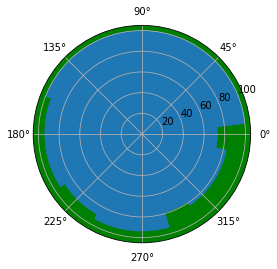

In [246]:
axes = plt.subplot(projection='polar', facecolor='g')
axes.bar(cities['wind_speed'], cities['humidity'])

In [253]:
def get_humidity(city_name):
    city_name = city_name.capitalize()
    city = cities.loc[cities.city==city_name]
    humiditys = []
    for deg in range(45, 361, 45):
        humidity = city.loc[(city.wind_deg < deg) & (city.wind_deg >= (deg-45)), 'humidity'].mean() 
        if np.isnan(humidity):
            humidity = 0
        humiditys.append(humidity)
    return humiditys

In [254]:
get_humidity('milano')

[64.95238095238095,
 59.77777777777778,
 58.55555555555556,
 55.5,
 50.785714285714285,
 39.666666666666664,
 35.0,
 49.5]

In [255]:
deg_range = np.arange(0, 2*np.pi, 2*np.pi/8)

In [261]:
def draw_rose(humiditys, city_name):
    plt.figure(figsize=(8,8))
    plt.subplot(projection='polar', facecolor='g')
    plt.bar(deg_range, humiditys, color=np.random.rand(8, 3), width=np.pi/4)
    plt.title(city_name)

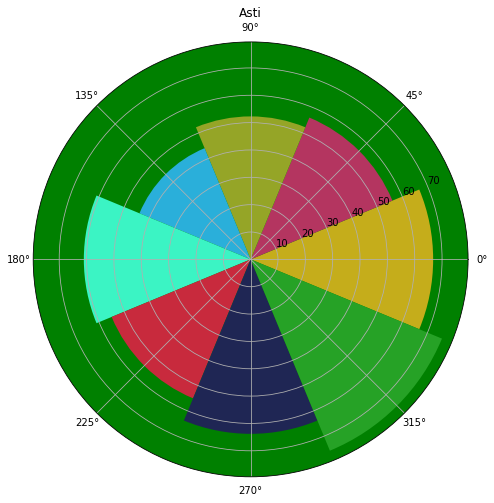

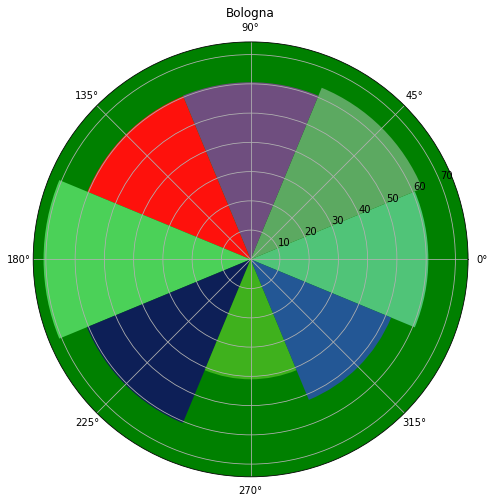

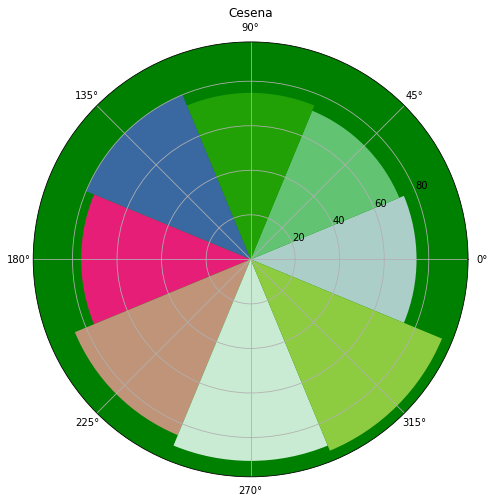

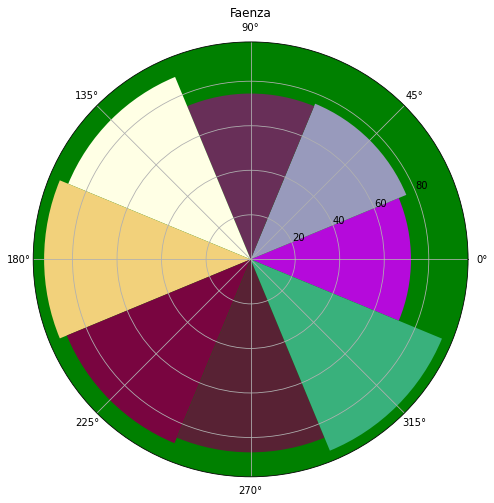

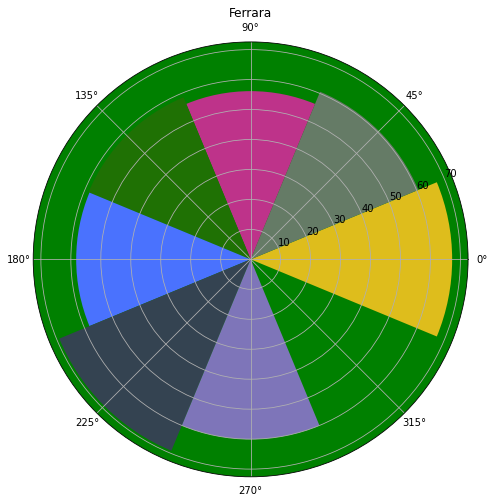

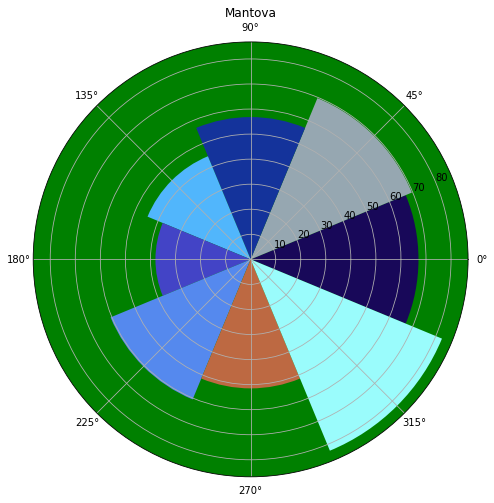

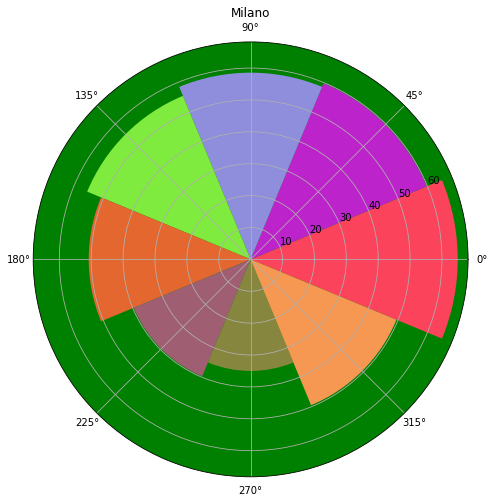

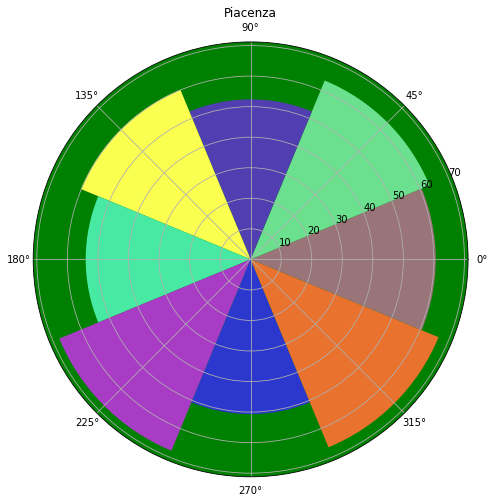

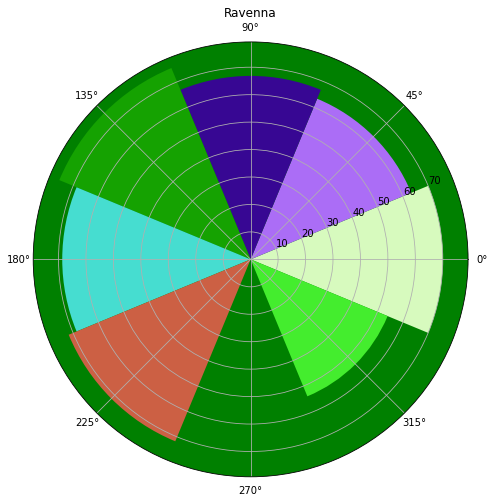

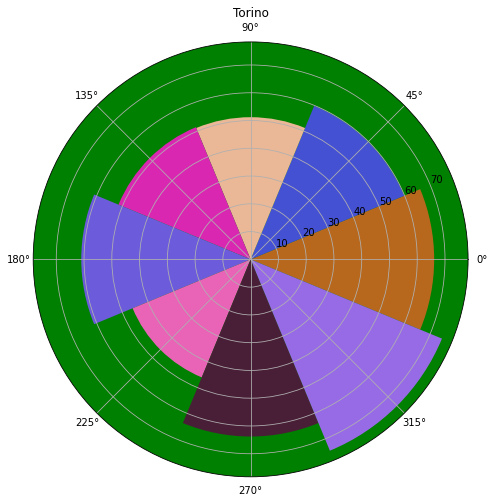

In [266]:
for city in cities.loc[:, 'city'].unique():
    draw_rose(get_humidity(city), city)